In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
def load_data(name):
    """
    Load data from a pickle file and print the keys of the dictionary."""
    try:
        with open(name, 'rb') as f:
            dict_data = pickle.load(f)
        print("Data loaded from file: ", name)
        return dict_data
    except FileNotFoundError:
        print(f"File {name} not found.")   
        return None

In [4]:
#enter folder name here
folder_name='folder/'
data_list=[]
for i in range(1, 100):
    # Load data
    name = f"{i}.pickle"
    dict_data = load_data(folder_name+name)
    if dict_data is None:
        break
    data_list.append(dict_data)
        

Data loaded from file:  folder/1.pickle
Data loaded from file:  folder/2.pickle
Data loaded from file:  folder/3.pickle
Data loaded from file:  folder/4.pickle
Data loaded from file:  folder/5.pickle
File folder/6.pickle not found.


In [5]:
# Function ot analyze the data to provide the resonance frequency and quality factor

def char(data):
    """
    Calculate resonance frequency and quality factor from S11 data."""
    # Calculate the characteristic impedance
    logmag_abs= 20*np.log10(1-np.abs(data['iq_s11']))
    ind_resonance = np.argmax(logmag_abs)
    resonance_freq = data['freq'][ind_resonance]
    resonance_freq_amp= logmag_abs[ind_resonance]
    # Calculate the quality factor
    uind=np.argmin(np.abs(logmag_abs[ind_resonance:]-(logmag_abs[ind_resonance]-3)))
    lind=np.argmin(np.abs(logmag_abs[:ind_resonance]-(logmag_abs[ind_resonance]-3)))
    fwhm = data['freq'][uind+ind_resonance] - data['freq'][lind]
    #print(ind_resonance+uind,lind,ind_resonance)
    #print(logmag_abs[ind_resonance],logmag_abs[uind+ind_resonance],logmag_abs[lind])
    Q = resonance_freq / fwhm
    return resonance_freq, Q, data["freq"][lind], data['freq'][uind+ind_resonance]

DATA_LIST 0, Resonance Frequency: 348.2, Quality Factor: 64.48148148148148
DATA_LIST 1, Resonance Frequency: 347.8, Quality Factor: 62.107142857142854
DATA_LIST 2, Resonance Frequency: 348.0, Quality Factor: 62.142857142857146
DATA_LIST 3, Resonance Frequency: 348.0, Quality Factor: 62.142857142857146
DATA_LIST 4, Resonance Frequency: 348.0, Quality Factor: 62.142857142857146


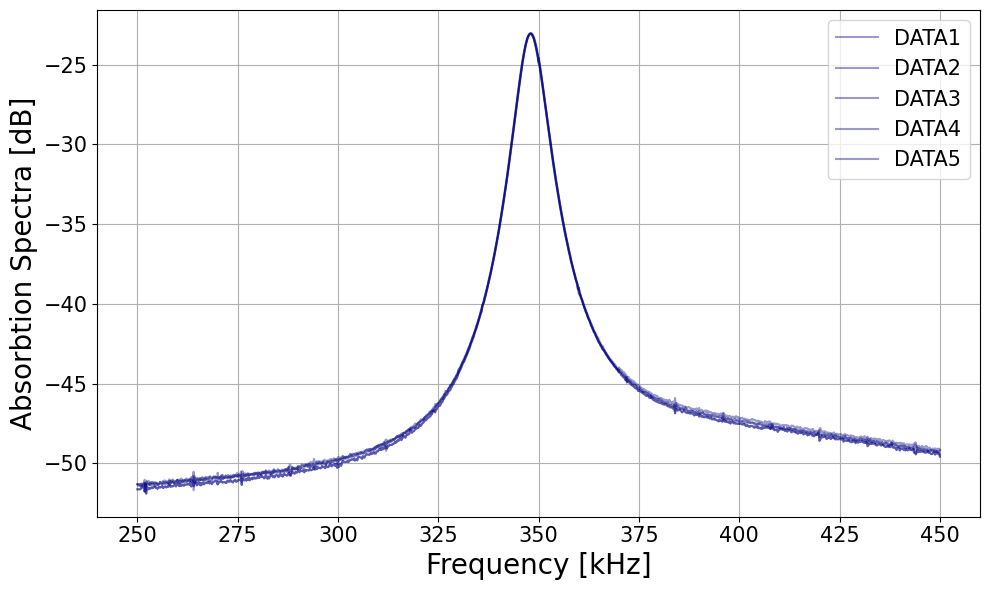

In [7]:
fbig=20
fsmall=15
plt.figure(figsize=(10, 6))
for i in range(len(data_list)):
    res_NS, Q_NS, L_NS, U_NS=char(data_list[i])

    plt.plot(data_list[i]['freq']/1e3, 20*np.log10(1-np.abs(data_list[i]['iq_s11'])), color='navy', alpha=0.4, label=f'DATA{i+1}')
   
    #plt.hlines(y=np.max(20*np.log10(1-np.abs(IQ_data_no_shield[i]['iq_s11'])))-3, xmin=L_NS/1e3, xmax=U_NS/1e3, color='navy', linestyle='--', alpha=1)
    #plt.vlines(x=res_NS/1e3, ymin=np.min(20*np.log10(1-np.abs(IQ_data_no_shield[i]['iq_s11']))), ymax=np.max(20*np.log10(1-np.abs(IQ_data_no_shield[i]['iq_s11']))), color='navy', alpha=0.5)
    print(f"DATA_LIST {i}, Resonance Frequency: {res_NS/1e3}, Quality Factor: {Q_NS}")
    
    

plt.xlabel('Frequency [kHz]', fontsize=fbig)
plt.ylabel('Absorbtion Spectra [dB]', fontsize=fbig)
#plt.ylim(-60, 20)
plt.xticks(fontsize=fsmall)
plt.yticks(fontsize=fsmall)
plt.grid(True)
plt.legend(fontsize=fsmall, loc='upper right')

# Show the plot
plt.tight_layout()
plt.savefig('RLC.svg', format='svg')
plt.show()